<a href="https://colab.research.google.com/github/KShrey00/Pneumonia-Detection-CNN/blob/main/Pneumonia_detectino_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
import zipfile
import os

zip_path = "/content/train.zip"  # replace with actual uploaded name if different
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/chest_xray")

data_dir = "/content/chest_xray"


In [5]:

img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% of training data for validation
)

train_gen = train_datagen.flow_from_directory(
    os.path.join(data_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 80% for training
)

val_gen = train_datagen.flow_from_directory(
    os.path.join(data_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use 20% for validation
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.7195 - loss: 0.6842 - val_accuracy: 0.8495 - val_loss: 0.3349
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.8658 - loss: 0.3072 - val_accuracy: 0.8811 - val_loss: 0.2890
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9106 - loss: 0.2479 - val_accuracy: 0.8591 - val_loss: 0.2909
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.9091 - loss: 0.2398 - val_accuracy: 0.9032 - val_loss: 0.2212
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.9043 - loss: 0.2469 - val_accuracy: 0.9022 - val_loss: 0.2417
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9180 - loss: 0.2140 - val_accuracy: 0.8936 - val_loss: 0.2592
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.9141 - loss: 0.2312 - val_accuracy: 0.9166 - val_loss: 0.2139
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9181 - loss: 0.2156 - val_accu

In [12]:
loss, accuracy = model.evaluate(val_gen)
print(f"Test Accuracy: {accuracy:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 879ms/step - accuracy: 0.9163 - loss: 0.1788
Test Accuracy: 0.9175


33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 881ms/step
              precision    recall  f1-score   support

      NORMAL       0.25      0.25      0.25       268
   PNEUMONIA       0.74      0.74      0.74       775

    accuracy                           0.62      1043
   macro avg       0.50      0.50      0.50      1043
weighted avg       0.61      0.62      0.62      1043



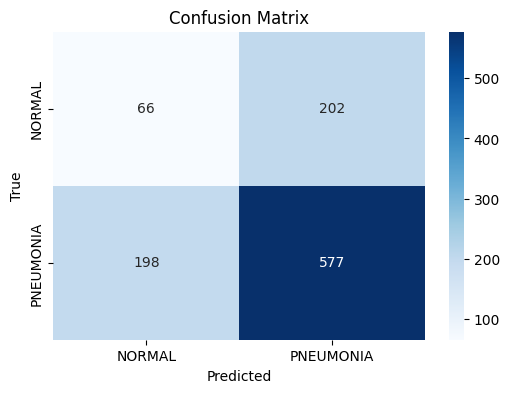

In [10]:
pred_probs = model.predict(val_gen)
pred_classes = (pred_probs > 0.5).astype("int32")
true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Classification report
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
